In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Dataset/Train.csv')

In [14]:
train_df.shape

(7000, 24)

In [3]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
train_df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [34]:
cat_columns = train_df.select_dtypes(include='object').columns

In [35]:
cat_columns

Index(['Employee_ID', 'Gender', 'Age', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service', 'Pay_Scale',
       'Compensation_and_Benefits', 'Work_Life_balance', 'VAR2', 'VAR4'],
      dtype='object')

In [36]:
train_df.select_dtypes(exclude='object').describe()

,Education_Level,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.187857,2.367143,47.064286,0.817857,2.798000,3.098571,-0.013606,2.834143,7.101286,3.257000,0.189376
std,1.065102,1.149395,15.761406,0.648205,1.163721,0.836377,0.986933,0.938945,1.164262,0.925319,0.185753
min,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,-2.776200,1.000000,5.000000,1.000000,0.000000
25%,3.000000,1.000000,33.000000,0.000000,2.000000,3.000000,-0.453700,2.000000,6.000000,3.000000,0.070400
50%,3.000000,2.000000,47.000000,1.000000,3.000000,3.000000,-0.453700,3.000000,7.000000,3.000000,0.142650
75%,4.000000,3.000000,61.000000,1.000000,3.000000,3.000000,0.707500,3.000000,8.000000,4.000000,0.235000
max,5.000000,4.000000,74.000000,2.000000,5.000000,5.000000,1.868800,5.000000,9.000000,5.000000,0.995900


In [38]:
print("Unique Values for categorical Columns")
for col in cat_columns:
    print(col, '   ----->', train_df[col].unique())

Unique Values for categorical Columns
Employee_ID    -----> ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Gender    -----> ['F' 'M']
Age    -----> ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Relationship_Status    -----> ['Married' 'Single']
Hometown    -----> ['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
Unit    -----> ['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']
Decision_skill_possess    -----> ['Conceptual' 'Analytical' 'Behavioral' 'Directive']
Time_of_service    -----> ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Pay_Scale    -----> ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Compensation_and_Benefits    -----> ['type2' 'type3' 'type0' 'type4' 'type1']
Work_Life_balance    -----> ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_

## Imputing null values with mean

In [19]:
null_col_dict = dict(train_df.isna().any())

In [24]:
for col in null_col_dict:
    if(null_col_dict[col]==True):
        col_mean = train_df[col].mean()
        train_df[col] = train_df.fillna(col_mean)

In [25]:
train_df.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [26]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,EID_23371,4,Married,Franklin,IT,Conceptual,EID_23371,4,...,type2,EID_23371,4,EID_23371,1.8688,EID_23371,4,5,3,0.1841
1,EID_18000,M,EID_18000,3,Single,Springfield,Logistics,Analytical,EID_18000,4,...,type2,EID_18000,3,EID_18000,-0.4537,EID_18000,3,5,3,0.0670
2,EID_3891,F,EID_3891,3,Married,Clinton,Quality,Conceptual,EID_3891,3,...,type2,EID_3891,4,EID_3891,-0.4537,EID_3891,3,8,3,0.0851
3,EID_17492,F,EID_17492,3,Single,Lebanon,Human Resource Management,Behavioral,EID_17492,3,...,type2,EID_17492,3,EID_17492,-0.4537,EID_17492,3,7,3,0.0668
4,EID_22534,F,EID_22534,1,Married,Springfield,Logistics,Conceptual,EID_22534,4,...,type3,EID_22534,1,EID_22534,-0.4537,EID_22534,2,8,2,0.1827


In [39]:
train_df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [40]:
cat_columns


Index(['Employee_ID', 'Gender', 'Age', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service', 'Pay_Scale',
       'Compensation_and_Benefits', 'Work_Life_balance', 'VAR2', 'VAR4'],
      dtype='object')

In [42]:
def treat_var2_var4_col(x):
    x=int(x[4:])
    return x
    

In [48]:
# train_df['VAR2']= train_df['VAR2'].apply(lambda x: treat_var2_var4_col(x))
# train_df['VAR4']= train_df['VAR4'].apply(lambda x: treat_var2_var4_col(x))
train_df['Work_Life_balance']= train_df['Work_Life_balance'].apply(lambda x: treat_var2_var4_col(x))


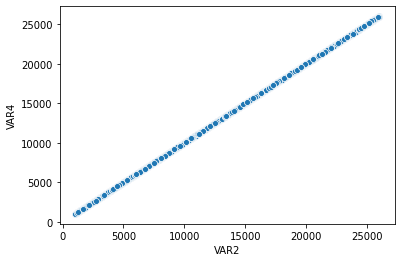

In [45]:
sns.scatterplot(train_df['VAR2'], train_df['VAR4'])

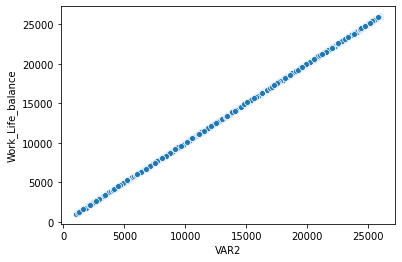

In [49]:
sns.scatterplot(train_df['VAR2'], train_df['Work_Life_balance'])

### Since both var2, var4, Work_life_Balance are same will drop two column

In [52]:
train_df.drop('VAR4',axis=1, inplace=True)
train_df.drop('Work_Life_balance',axis=1, inplace=True)
train_df.drop('Pay_Scale',axis=1, inplace=True)

In [53]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,EID_23371,4,Married,Franklin,IT,Conceptual,EID_23371,4,...,1,1,type2,4,23371,1.8688,4,5,3,0.1841
1,EID_18000,M,EID_18000,3,Single,Springfield,Logistics,Analytical,EID_18000,4,...,0,3,type2,3,18000,-0.4537,3,5,3,0.0670
2,EID_3891,F,EID_3891,3,Married,Clinton,Quality,Conceptual,EID_3891,3,...,0,2,type2,4,3891,-0.4537,3,8,3,0.0851
3,EID_17492,F,EID_17492,3,Single,Lebanon,Human Resource Management,Behavioral,EID_17492,3,...,1,3,type2,3,17492,-0.4537,3,7,3,0.0668
4,EID_22534,F,EID_22534,1,Married,Springfield,Logistics,Conceptual,EID_22534,4,...,1,3,type3,1,22534,-0.4537,2,8,2,0.1827


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   object 
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   object 
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Compensation_and_Benefits  7000 non-null   objec

In [59]:
cat_columns = list(train_df.select_dtypes(include='object'))

In [60]:
cat_columns

['Employee_ID',
 'Gender',
 'Age',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Compensation_and_Benefits']

In [61]:
train_df[cat_columns]

,Employee_ID,Gender,Age,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Compensation_and_Benefits
0,EID_23371,F,EID_23371,Married,Franklin,IT,Conceptual,EID_23371,type2
1,EID_18000,M,EID_18000,Single,Springfield,Logistics,Analytical,EID_18000,type2
2,EID_3891,F,EID_3891,Married,Clinton,Quality,Conceptual,EID_3891,type2
3,EID_17492,F,EID_17492,Single,Lebanon,Human Resource Management,Behavioral,EID_17492,type2
4,EID_22534,F,EID_22534,Married,Springfield,Logistics,Conceptual,EID_22534,type3
...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,EID_16328,Married,Franklin,Operarions,Behavioral,EID_16328,type3
6996,EID_8387,F,EID_8387,Married,Lebanon,R&D,Analytical,EID_8387,type3
6997,EID_8077,F,EID_8077,Single,Springfield,IT,Directive,EID_8077,type2
6998,EID_19597,F,EID_19597,Married,Washington,Sales,Behavioral,EID_19597,type0


In [62]:
train_df.drop(columns=['Age','Time_of_service'],axis=1,inplace=True)

In [63]:
train_df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,4,Married,Franklin,IT,Conceptual,4,33,1,1,type2,4,23371,1.8688,4,5,3,0.1841
1,EID_18000,M,3,Single,Springfield,Logistics,Analytical,4,36,0,3,type2,3,18000,-0.4537,3,5,3,0.0670
2,EID_3891,F,3,Married,Clinton,Quality,Conceptual,3,51,0,2,type2,4,3891,-0.4537,3,8,3,0.0851
3,EID_17492,F,3,Single,Lebanon,Human Resource Management,Behavioral,3,56,1,3,type2,3,17492,-0.4537,3,7,3,0.0668
4,EID_22534,F,1,Married,Springfield,Logistics,Conceptual,4,62,1,3,type3,1,22534,-0.4537,2,8,2,0.1827


In [71]:
cat_columns = list(train_df.select_dtypes(include='object'))
cat_columns = cat_columns[1:]
cat_columns

['Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [72]:
for col in cat_columns:
    train_df[col] = le.fit_transform(train_df[col])

In [74]:
train_df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,4,0,1,2,2,4,33,1,1,2,4,23371,1.8688,4,5,3,0.1841
1,EID_18000,1,3,1,3,3,0,4,36,0,3,2,3,18000,-0.4537,3,5,3,0.0670
2,EID_3891,0,3,0,0,8,2,3,51,0,2,2,4,3891,-0.4537,3,8,3,0.0851
3,EID_17492,0,3,1,2,1,1,3,56,1,3,2,3,17492,-0.4537,3,7,3,0.0668
4,EID_22534,0,1,0,3,3,2,4,62,1,3,3,1,22534,-0.4537,2,8,2,0.1827


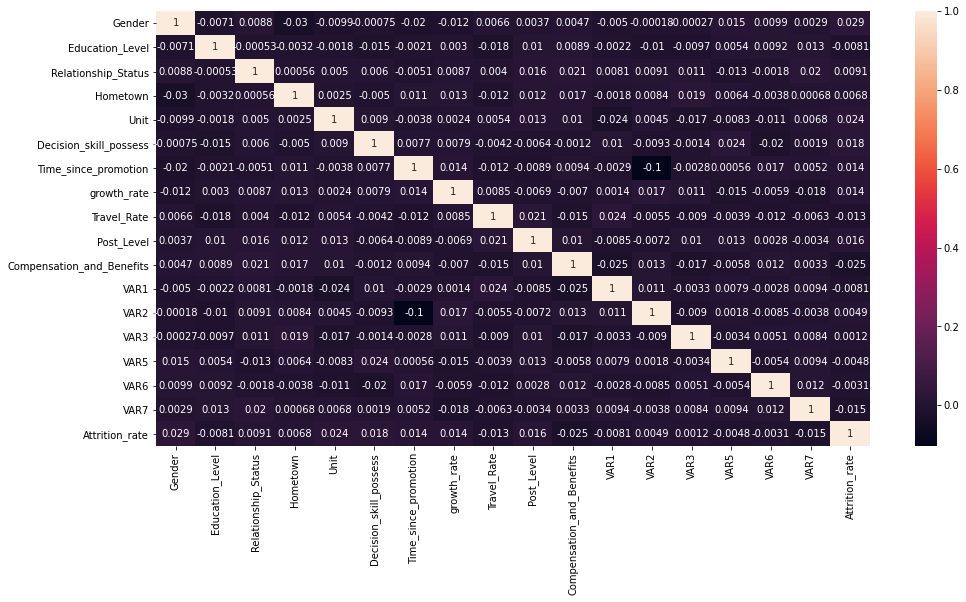

In [77]:
plt.figure(figsize=(16,8))
sns.heatmap(train_df.corr(),annot=True)

In [78]:
train_df.to_csv('Dataset/cleaned_train_file.csv',index=False)

In [79]:
train_df.shape

(7000, 19)